# Circle Notation Activity

## Imports

In [116]:
#Graphical representation of complex numbers
import matplotlib.pyplot as plt
import colorsys


# Math tools
import numpy as np
import math
import cmath

# Quantum Computing tools
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer


## Function Development

### Secondary Functions

In this section we will develop secondady functions that will be used in the main function. This functions are:
* **Relative_phase**: This function will calculate the relative phase between two complex numbers.
* **Phase2RGB**: This function will convert the phase of a complex number to a color.
* **Plot_Color_Spectrum**: This function will plot the color spectrum.


In [185]:
def Relative_phase(a,b):
    """
    This function calculates the relative phase between two complex numbers

    Parameters:
    a (complex): First complex number
    b (complex): Second complex number

    Returns:
    relative_phase (float): Relative phase between a and b
    """

    # Calculate the phase of each complex number
    phase_a = cmath.phase(a)
    phase_b = cmath.phase(b)

    # Calculate the relative phase
    relative_phase = phase_b - phase_a

    # Relative phase is between 0 and 2pi
    relative_phase = (relative_phase + 2* cmath.pi) % (2*math.pi)

    return relative_phase

def phase2RGB(phase):
    """
    Map a phase of a complex number to a color in (r, g, b).
    
    Parameters:
    phase (float): Phase of a complex number
    
    Returns:
    rgb (tuple): RGB values
    """
    rgb = colorsys.hls_to_rgb(phase / (np.pi * 2), 0.5, 0.5)
    return rgb

def plot_color_spectrum(num_points=1000):
    """
    Plot a circle with a spectrum of colors based on the angle.
    
    Parameters:
    num_points (int): Number of points to plot

    Returns:
    None
    """
    angles = np.linspace(0, 2 * np.pi, num_points)
    colors = [phase2RGB(angle) for angle in angles]

    fig, ax = plt.subplots(subplot_kw=dict(polar=True))

    ax.scatter(angles, np.ones_like(angles), c=colors, s=5000, marker='o', cmap='hsv', alpha=0.75)
    # Remove radial grid and labels
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.grid(False)
    ax.text(0, 0, "Phase Spectrum", ha='center', va='center', color='black')
    plt.show()

### Main Function

In [186]:

def Circles(a,b):
    """
    This function prints the circles representing the complex numbers a and b where the radius is the modulus
    since the modules are less or equal than 1, the circles are inside the unit circle

    Parameters:
    a (complex): First complex number
    b (complex): Second complex number

    Returns:
    None
    """
    # Calculate the modulus of each complex number
    modulus_a = abs(a)
    modulus_b = abs(b)
    phase = Relative_phase(a,b)

    # Print the circles unit circles and the circles representing the complex numbers inside
    #Unitary circles
    unit_circle1 = plt.Circle((0, 0), 1, color='black', fill=False)
    unit_circle2 = plt.Circle((2.5, 0), 1, color='black', fill=False)
    
    #Circles representing the complex numbers
    circle_a = plt.Circle((0, 0), modulus_a, color='b', fill=True)
    circle_b = plt.Circle((2.5, 0), modulus_b, color=phase2RGB(phase), fill=True)
    
    #Plot
    fig, ax = plt.subplots()
    ax.set_xlim((-1.2, 3.7))
    ax.set_ylim((-1.5, 1.5))
    ax.add_artist(unit_circle1)
    ax.add_artist(unit_circle2)
    ax.add_artist(circle_a)
    ax.add_artist(circle_b)
    # Add circle label
    ax.text(0, 1.3, "0", ha='center', va='center', color='black')
    ax.text(2.5, 1.3, "1", ha='center', va='center', color='black')
    
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_xticks([])

    plt.plot([0, modulus_a], [0, 0], color='black')
    plt.plot([2.5, 2.5+modulus_b*math.cos(phase)], [modulus_b*math.sin(phase), 0], color='black')
    plt.show()

Quantum state:  Statevector([7.07106781e-01+0.j        , 4.32978028e-17+0.70710678j],
            dims=(2,))
Relative phase:  0.5 pi


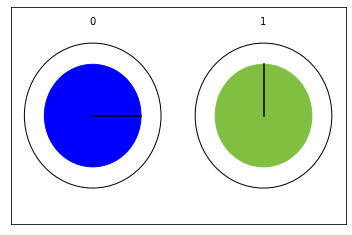

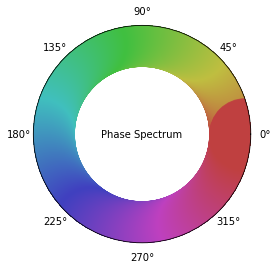

In [199]:
# Using qiskit we will try these functions in different quantum states
backend = Aer.get_backend('statevector_simulator')
# Quantum state 1
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q[0])

# Quantum state 2
q2 = QuantumRegister(1)
qc2 = QuantumCircuit(q2)
qc2.x(q2[0])
qc2.h(q2[0])

# Quantum state 3
q3 = QuantumRegister(1)
qc3 = QuantumCircuit(q3)
qc3.x(q3[0])
qc3.h(q3[0])
qc3.s(q3[0])

# Quantum state 4
q4 = QuantumRegister(1)
qc4 = QuantumCircuit(q4)
qc4.h(q4[0])
qc4.s(q4[0])


job = execute(qc4, backend)
result = job.result()
state = result.get_statevector(qc4)

relative_phase = Relative_phase(state[0],state[1])

print("Quantum state: ", state)
print("Relative phase: ", relative_phase/math.pi, "pi")
Circles(state[0],state[1])

plot_color_spectrum()